In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Analisis de MultinomialNB sin las intervenciones de menos de 300

In [3]:
# Cargamos los datasets con los resultados de la ejecución del modelo
df_iniciativas = pd.read_csv('/Users/juan/Desktop/TFG/code/datasets/diputados/resultados/LogRegy300/iniciativas.csv')
df_intervenciones = pd.read_csv('/Users/juan/Desktop/TFG/code/datasets/diputados/resultados/LogRegy300/intervenciones.csv')

In [4]:
# Comprobamos cuantos intervinientes no han llegado a obtener una clasificación Nan
print(df_intervenciones.info())

# Eliminamos las filas con valores Nan
df_intervenciones = df_intervenciones.dropna()
print(df_intervenciones.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   interviniente   313 non-null    object 
 1   intervenciones  313 non-null    int64  
 2   TP              313 non-null    int64  
 3   FP              313 non-null    int64  
 4   precision       131 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 12.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 0 to 204
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   interviniente   131 non-null    object 
 1   intervenciones  131 non-null    int64  
 2   TP              131 non-null    int64  
 3   FP              131 non-null    int64  
 4   precision       131 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 6.1+ KB
None


In [5]:
TPtotal = df_intervenciones['TP'].sum()
FPtotal = df_intervenciones['FP'].sum()
TotalClasificaciones = TPtotal + FPtotal
print(f'Se han clasificado en total {TotalClasificaciones} intervenciones')
print(f'Se han clasificado correctamente {TPtotal} intervenciones')
print(f'Se han clasificado incorrectamente {FPtotal} intervenciones')
print(f'Microprecision: {TPtotal/TotalClasificaciones}')
macroPrecisión = df_intervenciones['precision'].mean()
print(f'Macroprecisión: {macroPrecisión}')

Se han clasificado en total 26657 intervenciones
Se han clasificado correctamente 18942 intervenciones
Se han clasificado incorrectamente 7715 intervenciones
Microprecision: 0.7105825861874929
Macroprecisión: 0.6946365594731398


Con FUENSANTA

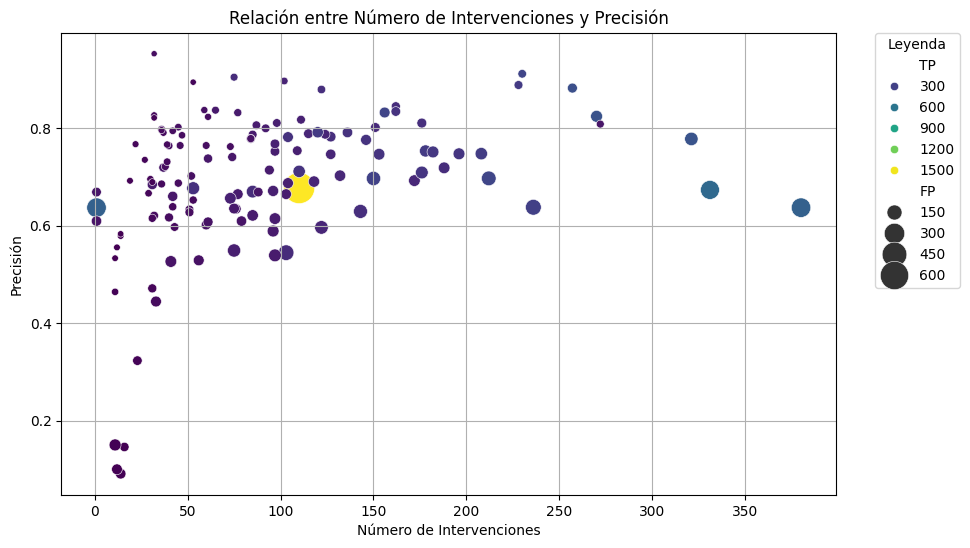

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_intervenciones, x='intervenciones', y='precision', hue='TP', size='FP', sizes=(20, 500), palette='viridis')
plt.xlabel('Número de Intervenciones')
plt.ylabel('Precisión')
plt.title('Relación entre Número de Intervenciones y Precisión')
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

Sin FUENSANTA

In [7]:
df_intervenciones = df_intervenciones.sort_values(by='TP', ascending=False)
df_intervenciones = df_intervenciones.reset_index(drop=True)
df_intervenciones = df_intervenciones.drop(0)
df_intervenciones = df_intervenciones[df_intervenciones['interviniente'] != 'IGNACIO-PELAYO-GARCÍA-RODRÍGUEZ']

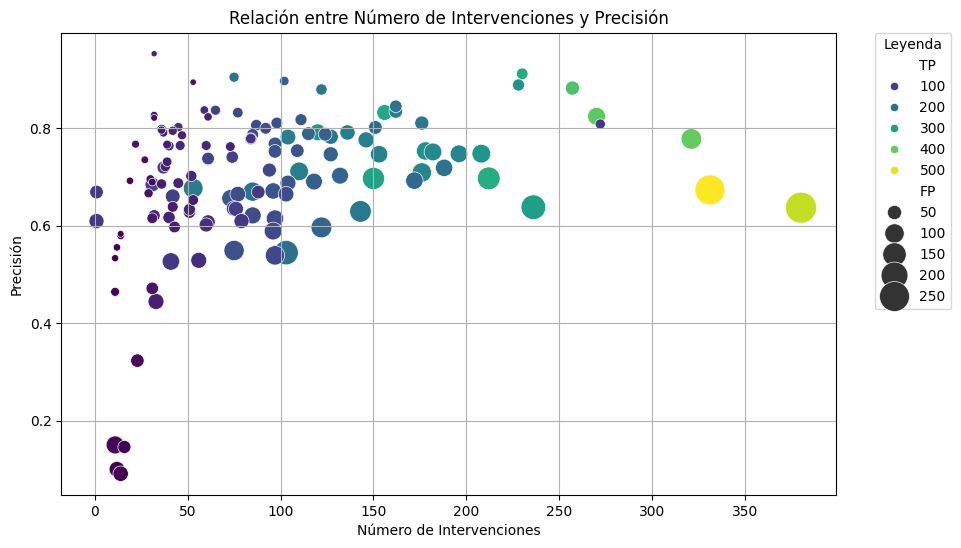

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_intervenciones, x='intervenciones', y='precision', hue='TP', size='FP', sizes=(20, 500), palette='viridis')
plt.xlabel('Número de Intervenciones')
plt.ylabel('Precisión')
plt.title('Relación entre Número de Intervenciones y Precisión')
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

Correlación entre intervenciones y TP: 0.9090643929200092


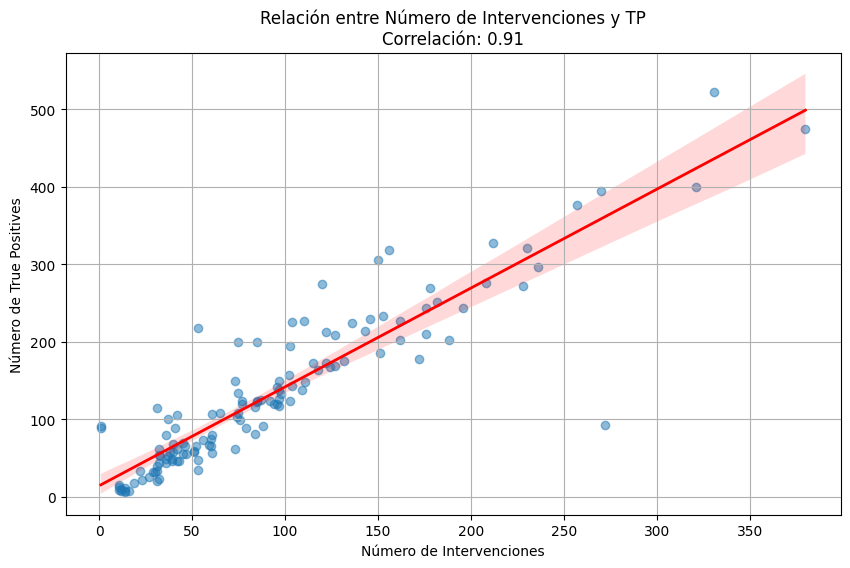

In [9]:
# Calcular la correlación
correlation = df_intervenciones['intervenciones'].corr(df_intervenciones['TP'])
print(f'Correlación entre intervenciones y TP: {correlation}')

# Añadir línea de tendencia
plt.figure(figsize=(10, 6))
sns.regplot(data=df_intervenciones, x='intervenciones', y='TP', scatter_kws={'alpha':0.5}, line_kws={'color':'red', 'lw':2})

# Título y etiquetas
plt.title(f'Relación entre Número de Intervenciones y TP\nCorrelación: {correlation:.2f}')
plt.xlabel('Número de Intervenciones')
plt.ylabel('Número de True Positives')
plt.grid(True)

# Mostrar el gráfico
plt.show()


Correlación entre intervenciones y FP: 0.6510626313886345


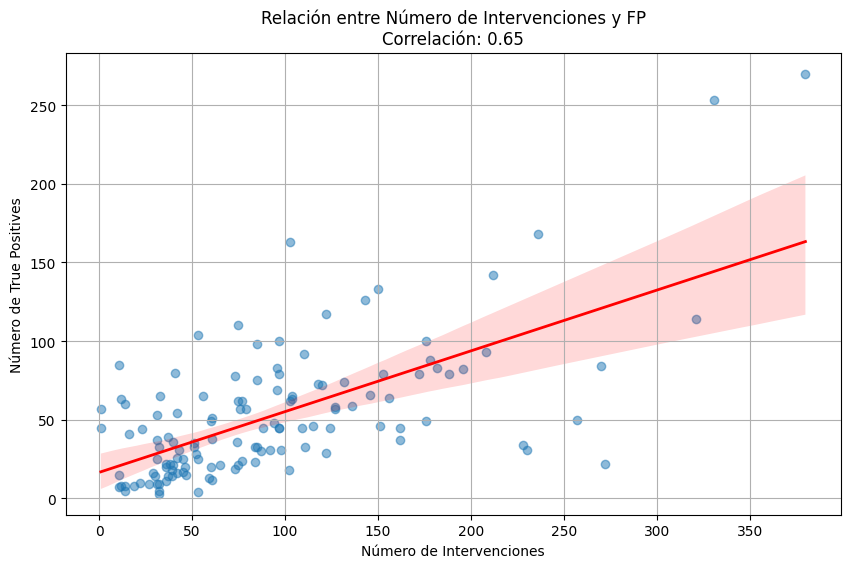

In [10]:
# Calcular la correlación
correlation = df_intervenciones['intervenciones'].corr(df_intervenciones['FP'])
print(f'Correlación entre intervenciones y FP: {correlation}')

# Añadir línea de tendencia
plt.figure(figsize=(10, 6))
sns.regplot(data=df_intervenciones, x='intervenciones', y='FP', scatter_kws={'alpha':0.5}, line_kws={'color':'red', 'lw':2})

# Título y etiquetas
plt.title(f'Relación entre Número de Intervenciones y FP\nCorrelación: {correlation:.2f}')
plt.xlabel('Número de Intervenciones')
plt.ylabel('Número de True Positives')
plt.grid(True)

# Mostrar el gráfico
plt.show()


Análisis de iniciativas

In [15]:
# Calcular macroprecisión por iniciativas
macro_precision = df_iniciativas['precision'].mean()
print(f'Macroprecisión por iniciativas: {macro_precision}')

Macroprecisión por iniciativas: 0.7516233177086555


/var/folders/2m/mlv2fsg14t52l377d2x2_5t40000gn/T/ipykernel_19919/4149702388.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_iniciativas, x='parrafos', y='precision', palette='viridis', alpha=0.7, s=100)


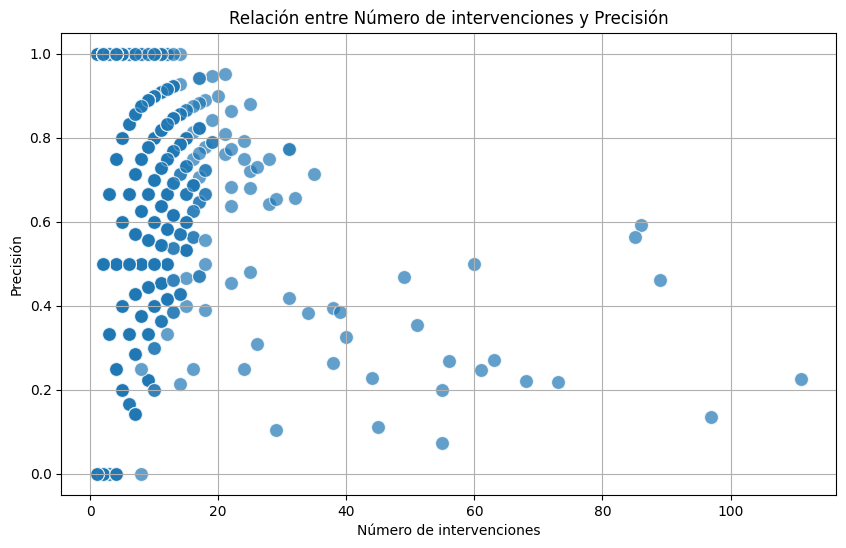

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iniciativas, x='parrafos', y='precision', palette='viridis', alpha=0.7, s=100)
plt.xlabel('Número de intervenciones')
plt.ylabel('Precisión')
plt.title('Relación entre Número de intervenciones y Precisión')
plt.grid(True)
plt.show()

/var/folders/2m/mlv2fsg14t52l377d2x2_5t40000gn/T/ipykernel_19919/3117978944.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_iniciativas, x='num_intervinientes', y='precision', palette='viridis', alpha=0.7, s=100)


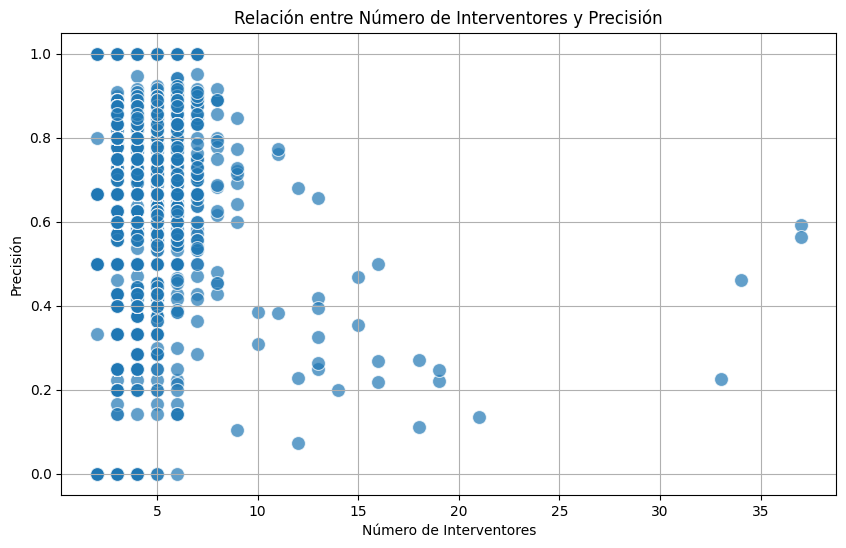

In [13]:
df_iniciativas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iniciativas, x='num_intervinientes', y='precision', palette='viridis', alpha=0.7, s=100)

# Añadir título y etiquetas
plt.xlabel('Número de Interventores')
plt.ylabel('Precisión')
plt.title('Relación entre Número de Interventores y Precisión')
plt.grid(True)

# Mostrar el gráfico
plt.show()


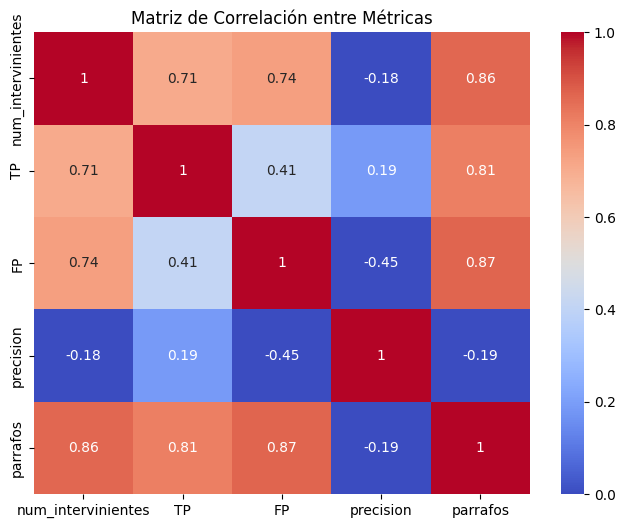

In [14]:
correlation_matrix = df_iniciativas[['num_intervinientes', 'TP', 'FP', 'precision', 'parrafos']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Matriz de Correlación entre Métricas')
plt.show()